<a href="https://colab.research.google.com/github/sheng-999/Airbnb/blob/analyse/Airbnb_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breakdown the notebook**


1.   Import libraries
2.   Import dataset
    - check data shape
    - checking data types
    - check infos
3.   Data cleaning
    - drop duplicates
    - cleaning indivudual columns
    - cleaning NA/Null values
    - Simple tranformations
4.   Data modeling & analyse
5.   Data Visualisations
   



**Import libraries**

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import ConnectionPatch

**Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nyc = pd.read_csv('/content/drive/MyDrive/Airbnb_NYC/AB_NYC_2019.csv')

print shape

In [ ]:
nyc.shape

(48895, 16)

print data types

In [ ]:
nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Data cleaning**
1. drop duplcates

In [ ]:
nyc.duplicated().sum()

0

There's no duplicated values

2. cleaning individual columns:
The columns id, name, host_name and last_review are not necessary for this analyse. we could drop them.

In [ ]:
nyc.drop(columns=['id','name','host_name', 'last_review'], axis=1, inplace=True)

In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [ ]:
nyc.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


3. check null values & cleaning

In [ ]:
nyc.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

we could replace the nulls from reviews_per_month by '0'

In [ ]:
nyc['reviews_per_month'].fillna(0, inplace = True)

In [ ]:
nyc.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

describe dataset

In [ ]:
nyc.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
nyc.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Correlations between different columns

<ipython-input-57-98932ff8c4a8>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

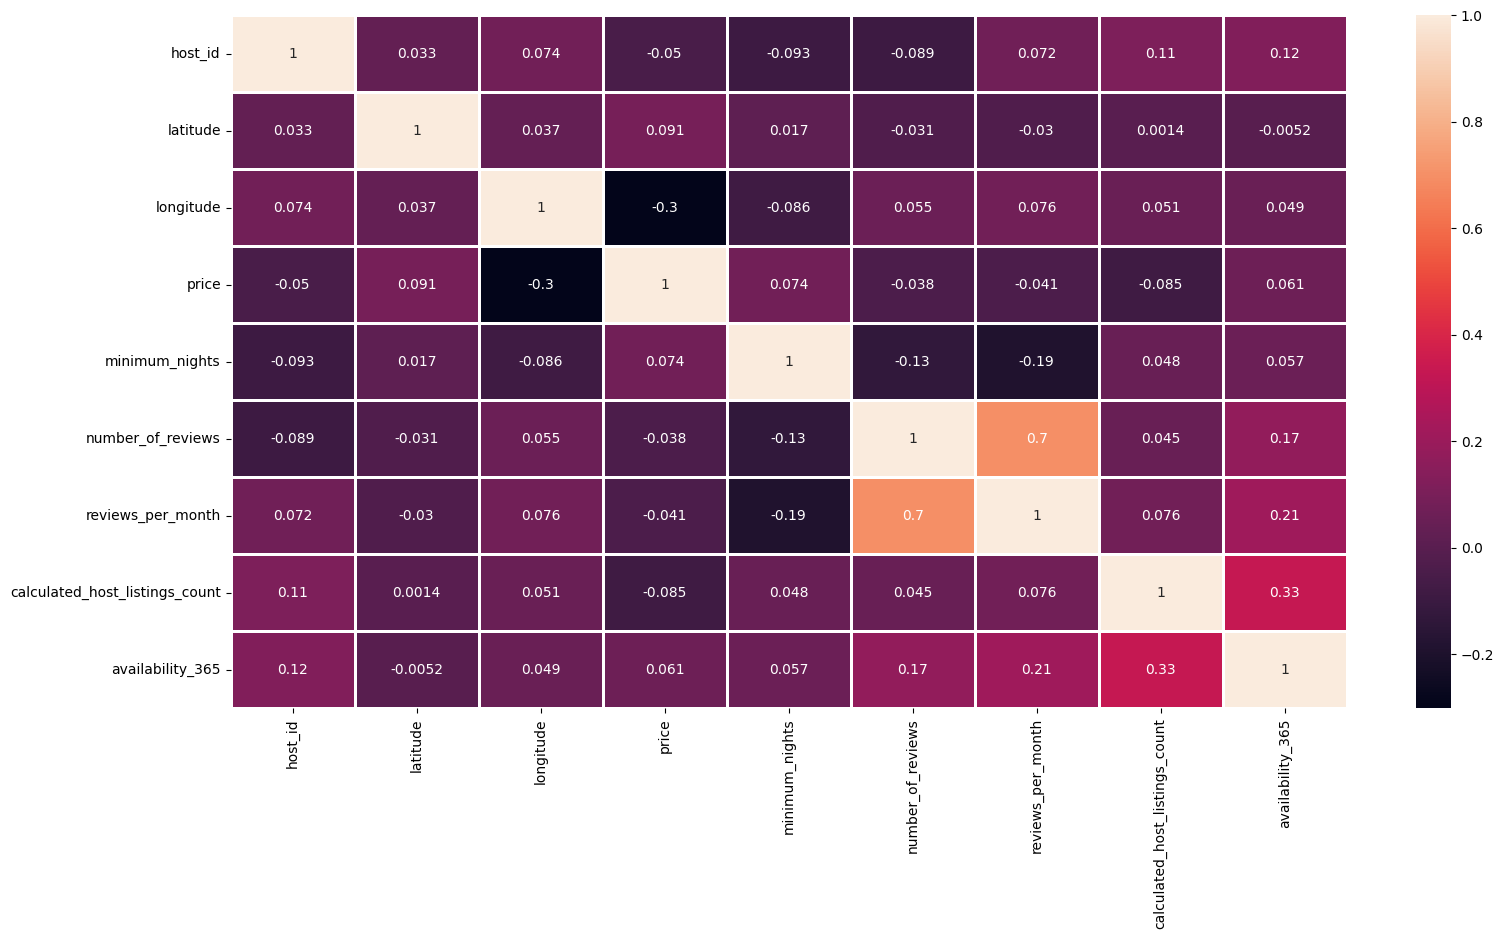

In [ ]:
cor = nyc.corr(method='kendall')
plt.figure(figsize= (18,9))
sns.heatmap(cor, linewidth= 2, annot=True)

**Data Visualisations**

In [ ]:
nyc.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

*Neigbourhood*

--- Numbers of airbnb

In [ ]:
numbers = nyc.groupby('neighbourhood_group')['neighbourhood'].count()
numbers

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

In [175]:
nb_by_group = px.bar(numbers,
        labels = {
      'neighbourhood_group': 'Neighbourhood Group',
      'value': 'Numbers'
   },
       title = 'Numbers of Airbnbs by Neighbourhood Group',
       color = nyc['neighbourhood_group'].unique()
       )

nb_by_group



---  Average price by neighbourhood



In [176]:
avg_price = nyc.groupby('neighbourhood_group')['price'].mean()
group = nyc['neighbourhood_group'].unique()
avg_by_group = px.bar(
        y=avg_price,
        x=group,
        color = group,
        title= 'Average Price by Neighbourhood Group',
        labels ={
            'x': 'Neighbourhood Group',
            'y': 'Average Price'
        }
        )

avg_by_group
# Highest average price is in Queens district while lowest one is Brooklyn

*Room type*

In [ ]:
room_type_number = nyc.groupby('room_type')['host_id'].count()
room_type_number

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: host_id, dtype: int64

([<matplotlib.patches.Wedge at 0x7aef44438b50>,
 [Text(0.8494217903479411, 0.8476335423295249, 'Entire home/apt'),
  Text(-0.8343326428882634, -0.7168605450232883, 'Private room'),
  Text(0.663982267137464, -0.8769991727059916, 'Shared room')],
 [Text(0.4954960443696323, 0.49445289969222284, '52.0%'),
  Text(-0.45509053248450726, -0.3910148427399754, '45.7%'),
  Text(0.36217214571134393, -0.478363185112359, '2.4%')])

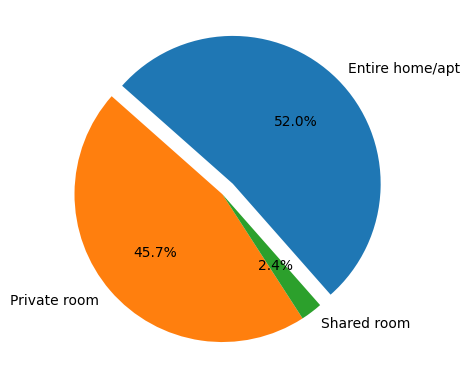

In [ ]:
plt.pie(room_type_number,
        labels = ['Entire home/apt', 'Private room', 'Shared room'],
        startangle=angle,
        explode=explode,
        autopct='%1.1f%%')

The number of entire home/apt occupied 52% of total numbers.



--- average price by room type



In [ ]:
avg_room = nyc.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64



--- average price by room type in different neighbourhood group



In [177]:
r_type = px.bar(avg_room,
        labels = {'room_type': 'Room Type', 'value': 'Average Price'}
        )
r_type

*Map of neighbour hood *

In [178]:
map = px.scatter(nyc, x=nyc['longitude'],y=nyc['latitude'],color=nyc['neighbourhood_group'],
           width=1200, height=800,
           trendline='lowess')

map